In [108]:
import pandas as pd
import numpy as np
import seaborn as sns

import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib widget

In [3]:
houses = pd.read_csv("data/King_County_House_prices_dataset.csv")

In [4]:
houses.head(11)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [5]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [13]:
houses.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [20]:
houses.iloc[: , 2:].describe().round(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,19221.0,21534.0,21597.0,21597.0,21597.0,21597.0,17755.0,21597.0,21597.0,21597.0,21597.0,21597.0
mean,540296.6,3.4,2.1,2080.3,15099.4,1.5,0.0,0.2,3.4,7.7,1788.6,1971.0,83.6,98078.0,47.6,-122.2,1986.6,12758.3
std,367368.1,0.9,0.8,918.1,41412.6,0.5,0.1,0.8,0.7,1.2,827.8,29.4,399.9,53.5,0.1,0.1,685.2,27274.4
min,78000.0,1.0,0.5,370.0,520.0,1.0,0.0,0.0,1.0,3.0,370.0,1900.0,0.0,98001.0,47.2,-122.5,399.0,651.0
25%,322000.0,3.0,1.8,1430.0,5040.0,1.0,0.0,0.0,3.0,7.0,1190.0,1951.0,0.0,98033.0,47.5,-122.3,1490.0,5100.0
50%,450000.0,3.0,2.2,1910.0,7618.0,1.5,0.0,0.0,3.0,7.0,1560.0,1975.0,0.0,98065.0,47.6,-122.2,1840.0,7620.0
75%,645000.0,4.0,2.5,2550.0,10685.0,2.0,0.0,0.0,4.0,8.0,2210.0,1997.0,0.0,98118.0,47.7,-122.1,2360.0,10083.0
max,7700000.0,33.0,8.0,13540.0,1651359.0,3.5,1.0,4.0,5.0,13.0,9410.0,2015.0,2015.0,98199.0,47.8,-121.3,6210.0,871200.0


In [40]:
houses.sort_values("bedrooms").tail(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15147,5566100170,10/29/2014,650000.0,10,2.00,3610,11914,2.0,0.0,0.0,...,7,3010,600.0,1958,0.0,98006,47.5705,-122.175,2040,11914
13301,627300145,8/14/2014,1150000.0,10,5.25,4590,10920,1.0,0.0,2.0,...,9,2500,2090.0,2008,0.0,98004,47.5861,-122.113,2730,10400
19239,8812401450,12/29/2014,660000.0,10,3.00,2920,3745,2.0,0.0,0.0,...,7,1860,1060.0,1913,0.0,98105,47.6635,-122.320,1810,3745
8748,1773100755,8/21/2014,520000.0,11,3.00,3000,4960,2.0,0.0,0.0,...,7,2400,600.0,1918,1999.0,98106,47.5560,-122.363,1420,4960
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


<AxesSubplot:ylabel='Frequency'>

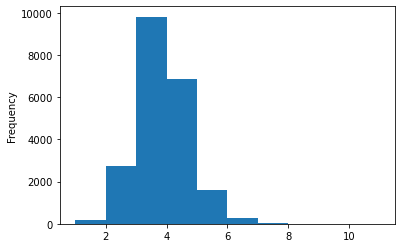

In [37]:
houses.bedrooms.sort_values()[:-1].plot(kind="hist")

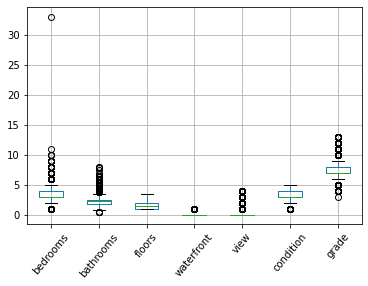

In [62]:
cols = [col for col in houses.columns if col not in ["id", "date", "price", "sqft_lot", "sqft_lot15",
                                                     "lat", "long", "zipcode", "sqft_living", "sqft_above", 
                                                     "sqft_living15", "yr_built", "yr_renovated"]]

houses[cols].boxplot()
plt.xticks(rotation=50);

In [95]:
houses.view.value_counts()
#houses.view.plot(kind="hist", bins = )

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/matplotlib/text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


# BUILDING GRADE

Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:

**1-3** Falls short of minimum building standards. Normally cabin or inferior structure.

**4** Generally older, low quality construction. Does not meet code.

**5** Low construction costs and workmanship. Small, simple design.

**6** Lowest grade currently meeting building code. Low quality materials and simple designs.

**7** Average grade of construction and design. Commonly seen in plats and older sub-divisions.

**8** Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

**9** Better architectural design with extra interior and exterior design and quality.

**10** Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

**11** Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

**12** Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

**13** Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc. 

In [64]:
yr_built_ar = houses.yr_built.unique()

print(np.sort(yr_built_ar))

len(yr_built_ar)

[1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913
 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927
 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941
 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955
 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969
 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983
 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997
 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015]


116

In [74]:
yr_bins = np.arange(1900, 2021, 20)
print(yr_bins)
yr_series = pd.cut(houses['yr_built'], bins=yr_bins, labels=yr_bins[:-1])
print(yr_series.unique())
yr_series.name = 'yr_bins'
houses = pd.concat([houses, yr_series], axis=1)
houses.head()

[1900 1920 1940 1960 1980 2000 2020]
[1940, 1920, 1960, 1980, 2000, NaN, 1900]
Categories (6, int64): [1900 < 1920 < 1940 < 1960 < 1980 < 2000]


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_bins
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,1940
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1940
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,1920
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,1960
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,1980


In [75]:
yr_renovated_series = pd.cut(houses['yr_built'], bins=yr_bins, labels=yr_bins[:-1])
print(yr_renovated_series.unique())
yr_renovated_series.name = 'yr_ren_bins'
houses = pd.concat([houses, yr_renovated_series], axis=1)
houses.head()

[1940, 1920, 1960, 1980, 2000, NaN, 1900]
Categories (6, int64): [1900 < 1920 < 1940 < 1960 < 1980 < 2000]


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_bins,yr_ren_bins
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,1940,1940
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1940,1940
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,1920,1920
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,1960,1960
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,1980,1980


In [86]:
sns.lmplot("sqft_living", "price", data=houses, hue="condition", col="waterfront")
plt.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

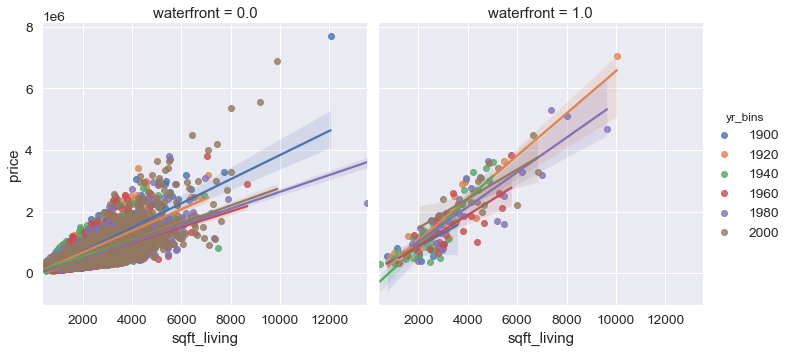

In [136]:
g = sns.lmplot("sqft_living", "price", houses, col="waterfront", hue="yr_bins")

In [96]:
#%matplotlib inline

corrmat = houses.corr()
plt.subplots(figsize=(9, 7))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.tight_layout()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

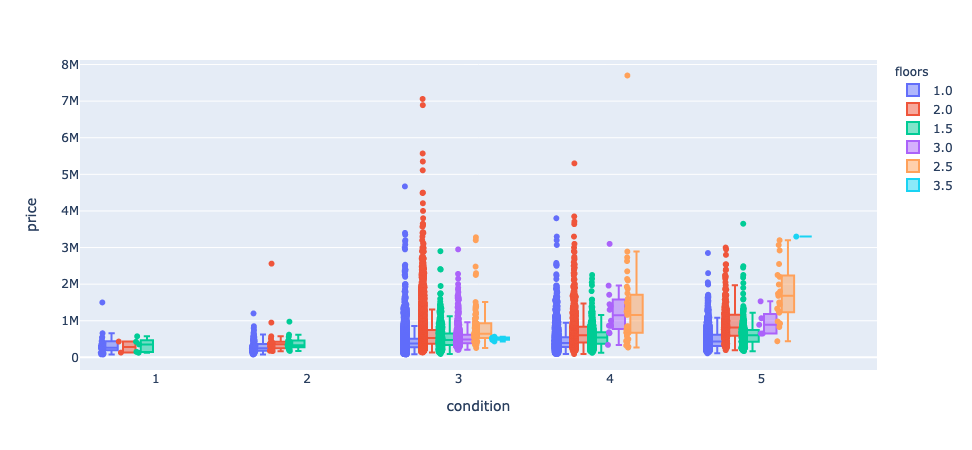

In [113]:
fig_box = px.box(houses, x="condition", y = houses.price, points="all", color="floors", 
                 hover_data =['price', 'grade'])
fig_box.show()

In [124]:
houses.eval('price_per_sqft_living = price / sqft_living', inplace=True)

In [125]:
houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_bins,yr_ren_bins,price_per_sqft_living
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1955,0.0,98178,47.5112,-122.257,1340,5650,1940,1940,188.050847
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,1940,1940,209.338521
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,1933,NaN,98028,47.7379,-122.233,2720,8062,1920,1920,233.766234
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1965,0.0,98136,47.5208,-122.393,1360,5000,1960,1960,308.163265
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1987,0.0,98074,47.6168,-122.045,1800,7503,1980,1980,303.571429


In [130]:
groupie = houses.groupby("yr_renovated").mean()

<AxesSubplot:xlabel='yr_renovated'>

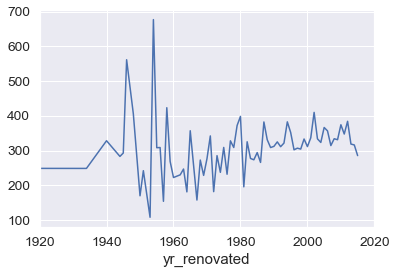

In [134]:
groupie["price_per_sqft_living"].plot(xlim = (1920, 2020))

In [138]:
groupie_sold = houses.groupby("date").mean()
groupie_sold
#groupie_sold["price_per_sqft_living"].plot()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft_living
date,,,,,,,,,,,,,,,,,,,,
1/10/2015,5.437600e+09,325000.000000,4.000000,2.500000,2240.000000,5105.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2240.000000,2002.000000,0.000000,98042.000000,47.392200,-122.165000,1920.000000,5288.000000,145.089286
1/12/2015,5.139086e+09,610550.833333,3.523810,2.238095,2343.095238,23537.619048,1.428571,0.000000,0.238095,3.333333,8.023810,1965.952381,1973.500000,55.944444,98075.166667,47.563410,-122.207143,2257.380952,18514.309524,252.723349
1/13/2015,4.529411e+09,519009.651163,3.186047,2.069767,1994.697674,16520.000000,1.569767,0.000000,0.279070,3.279070,7.790698,1861.674419,1976.837209,162.243243,98062.534884,47.551288,-122.159256,1961.674419,15837.581395,274.187364
1/14/2015,4.775720e+09,498381.372549,3.352941,2.215686,2137.450980,13008.313725,1.529412,0.041667,0.333333,3.215686,7.647059,1831.960784,1974.058824,0.000000,98086.156863,47.534180,-122.235118,1993.333333,11110.058824,242.368880
1/15/2015,4.493323e+09,483999.333333,3.355556,2.150000,1994.888889,19911.422222,1.355556,0.025000,0.227273,3.311111,7.400000,1718.888889,1964.333333,49.125000,98083.133333,47.507878,-122.272933,1846.000000,13160.444444,241.137051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9/5/2014,4.339696e+09,540583.709302,3.511628,2.238372,2133.441860,27234.430233,1.517442,0.000000,0.209302,3.395349,7.848837,1780.418605,1972.174419,208.567164,98084.639535,47.570726,-122.221326,1961.418605,12796.941860,259.986564
9/6/2014,2.402221e+09,347500.000000,2.200000,1.250000,1266.000000,6711.200000,1.500000,0.000000,0.200000,3.400000,6.800000,1266.000000,1954.800000,401.000000,98103.600000,47.549000,-122.287800,1760.000000,5848.800000,288.830854
9/7/2014,4.996156e+09,390700.000000,3.500000,1.750000,1795.000000,5596.000000,1.500000,0.000000,0.000000,3.500000,7.500000,1530.000000,1982.500000,0.000000,98129.500000,47.653450,-122.362000,1525.000000,5508.500000,217.678616


In [165]:
import plotly
#import plotly.chart_studio as py
import plotly.graph_objs as go
#plotly.offline.init_notebook_mode()

housing = pd.read_csv("data/King_County_House_prices_dataset.csv")
housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [168]:
#coords = pd.concat([housing['lat'], housing['long'], housing['price']], axis=1)
##coords = coords.sample(frac=0.1, replace=True)
#cases = []
#colors = ['rgb(239,243,255)','rgb(189,215,231)','rgb(107,174,214)','rgb(33,113,181)']
##months = {6:'June',7:'July',8:'Aug',9:'Sept'}
#
#for i in range(6,10)[::-1]:
#    cases.append(go.Scattergeo(
#        lon = coords['long'],
#        lat = coords['lat'],
#        marker = dict(
#            size = coords['price'],
#            color = 'colors[i-6]',
#            opacity = .4,
#            line = dict(width = 0)
#        ),
#    ) )
#
#cases[0]['mode'] = 'markers'
#
#layout = go.Layout(
#    title = 'Hey look! It\'s a scatter plot on a map!',
#    geo = dict(
#        resolution = 100,
#        scope = 'usa',
#        showframe = False,
#        showcoastlines = True,
#        showland = True,
#        landcolor = "rgb(229, 229, 229)",
#        countrycolor = "rgb(255, 255, 255)" ,
#        coastlinecolor = "rgb(255, 255, 255)",
#        projection = dict(
#            type = 'Mercator'
#        ),
#        lonaxis = dict( range= [ -124.0, -113.0 ] ),
#        lataxis = dict( range= [ 32.0, 43.0 ] ),
#        
#    ),
#    legend = dict(
#           traceorder = 'reversed'
#    )
#)
#
#
#fig = go.Figure(layout=layout, data=cases)
#plotly.offline.iplot(fig, validate=False, filename='iantest')

ValueError: 
    Invalid value of type 'builtins.str' received for the 'color' property of scattergeo.marker
        Received value: 'colors[i-6]'

    The 'color' property is a color and may be specified as:
      - A hex string (e.g. '#ff0000')
      - An rgb/rgba string (e.g. 'rgb(255,0,0)')
      - An hsl/hsla string (e.g. 'hsl(0,100%,50%)')
      - An hsv/hsva string (e.g. 'hsv(0,100%,100%)')
      - A named CSS color:
            aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, rebeccapurple, saddlebrown, salmon,
            sandybrown, seagreen, seashell, sienna, silver,
            skyblue, slateblue, slategray, slategrey, snow,
            springgreen, steelblue, tan, teal, thistle, tomato,
            turquoise, violet, wheat, white, whitesmoke,
            yellow, yellowgreen
      - A number that will be interpreted as a color
        according to scattergeo.marker.colorscale
      - A list or array of any of the above